In [117]:
import numpy as np
import pandas as pd

n_points = 500

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (100*age) +200*(performance) + 500*age/performance -10000 + 500*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

print(sum(y))
data.head()

128


,age,performance,y
0,45.69,-8.597194,0
1,42.49,-4.468938,0
2,30.96,-3.346693,0
3,40.14,-8.997996,0
4,50.32,-4.228457,0


In [118]:
#Add Outliers
import random

for n in range(20):
    num = random.randint(0, n_points)
    if data['y'][num] == 0:
        data['y'][num] = 1
    else:
        data['y'][num] = 0

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


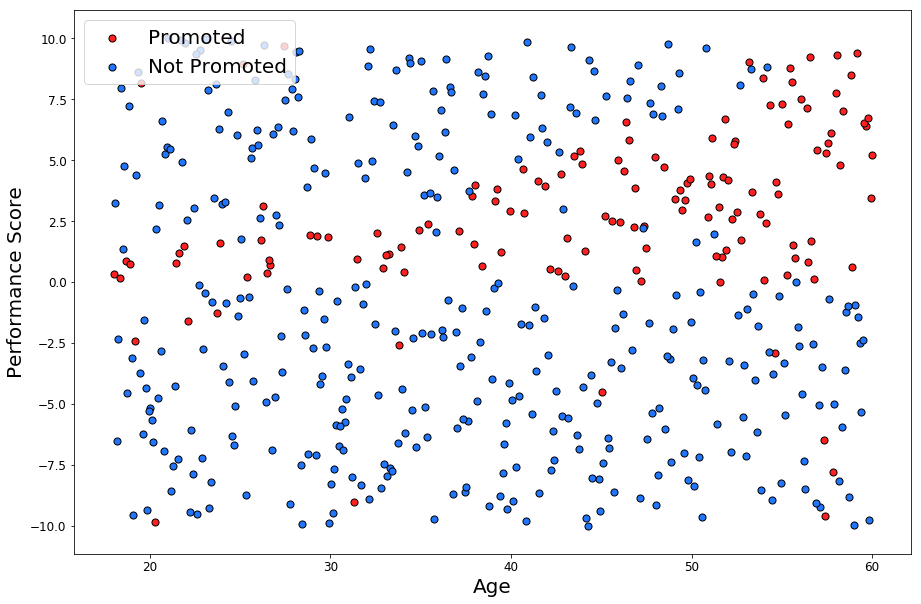

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

#plt.savefig('../figures/article_feature_eng/figure1.png',format='png')

In [123]:

from sklearn.ensemble import RandomForestClassifier

x = data[['age','performance']]
x = sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = RandomForestClassifier(n_estimators=5000,max_depth=2) #fit logistic regression model
model.fit(x_train, y_train)


#train accuracy
predictions = np.around(model.predict(x_train)) 
accuracy = metric.accuracy_score(y_train,predictions)

print(round(accuracy*100,2))

#test accuracy
predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))

/Users/conorosully/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


83.14
93.33


/Users/conorosully/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text xticklabel objects>)

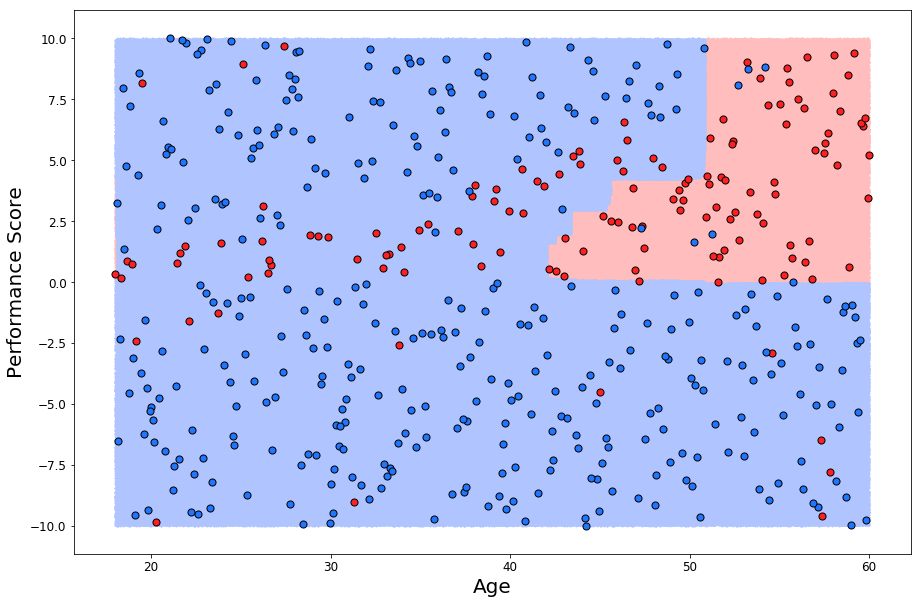

In [124]:
n_points = 1000000 #use many point to visualise decision boundry

age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)

performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age':age_db,'performance':performance_db})
data_db = sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

#plt.savefig('../figures/article_feature_eng/figure2.png',format='png')